In [1]:
import sympy as sp
import numpy as np
from os.path import expanduser, join
import os

In [2]:
# home_dir = expanduser('~')
# data_dir = join(home_dir,'SCPT files')
# data_dir

'C:\\Users\\fahad\\SCPT files'

In [3]:
# results = [join(data_dir,each) 
#            for each in sorted(os.listdir(data_dir)) 
#            if each.endswith('.csv')]
# results

['C:\\Users\\fahad\\SCPT files\\B1-TV1 opening.csv']

In [4]:
# np.loadtxt(results, dtype=float, 
#             skiprows=1, delimiter=',', usecols=54, unpack=False)

In [5]:
# import pandas as pd

In [6]:
# pd.read_csv(results, dtype=float, 
#             skiprows=1, delimiter=',', usecols=(30))

In [7]:
# w_top = pd.read_excel('D:\Shear zones\SCPT files\B1-TV1 opening.xlsx', usecols=('BA'), nrows = 156)
# #w_top

In [8]:
# w_bott_1 = pd.read_excel('D:\Shear zones\SCPT files\B1-TV1 opening.xlsx', usecols=('BB'), nrows = 156)
# #w_bott_1

In [9]:
# w_bott_0 = pd.read_excel('D:\Shear zones\SCPT files\B1-TV1 opening.xlsx', usecols=('BC'), nrows = 156)
# #w_bott_0

In [10]:
# s_bott = pd.read_excel('D:\Shear zones\SCPT files\B1-TV1 opening.xlsx', usecols=('BD'), nrows = 156)
# #s_bott

In [11]:
# height = pd.read_excel('D:\Shear zones\SCPT files\B1-TV1 opening.xlsx', usecols=('H'), nrows = 156)
# #height

In [12]:
# w_top_arr = np.array([w_top])
# s_bott_arr = np.array([s_bott])
# w_bott_0_arr = np.array([w_bott_0])
# w_bott_1_arr = np.array([w_bott_1])
# height_arr = np.array([height])
# #height_arr

In [13]:
%matplotlib widget
import ibvpy.api as ib
import matplotlib.pylab as plt
from matplotlib import cm
from scipy.interpolate import interp2d
from scipy.signal import argrelextrema
from bmcs_shear.api import CrackBridgeAdv
from bmcs_shear.dic_crack import\
    DICGrid, DICStateFields, DICCrackList, DICCrack, DICCrackCOR, DICAlignedGrid
from bmcs_shear.shear_crack.crack_path import get_T_Lab
import numpy as np
import ibvpy.api as ib
np.seterr(divide ='ignore', invalid='ignore');

In [14]:
dic_grid = DICGrid(U_factor=100, dir_name='B1_TV1', t=1)
#dic_grid = DICGrid(start_t=0, end_t=1, U_factor=100, dir_name='B9_TV1', t=1)
dsf = DICStateFields(dic_grid=dic_grid)
dsf.tmodel_.trait_set(E=5000, c_T=0, nu=0.18, epsilon_0=0.0005, epsilon_f=0.01);
dsf.eval()

dcl = DICCrackList(dsf=dsf)
crit_crack = dcl.items[3]
crit_crack.cl.dsf
dc_cor = DICCrackCOR(dic_crack = crit_crack)

Creating cracks


In [15]:
from bmcs_shear.dic_crack import DICStressProfile
dic_grid = DICGrid(U_factor=100, dir_name='B1_TV1', t=1)
#dic_grid = DICGrid(start_t=0, end_t=1, U_factor=100, dir_name='B9_TV1', t=1)
dsf = DICStateFields(dic_grid=dic_grid)
dsf.tmodel_.trait_set(E=5000, c_T=0, nu=0.18, epsilon_0=0.0005, epsilon_f=0.01);
dsf.eval()

dcl = DICCrackList(dsf=dsf)
crack_5 = dcl.items[3]
crack_5.cl.dsf
dc_cor = DICCrackCOR(dic_crack = crack_5)


sp = DICStressProfile(dic_crack = crack_5)

Creating cracks


In [16]:
np.shape(sp.u_t_crc_Kb[:73,0])

(73,)

In [17]:
np.shape(crack_5.x_1_crc_Ka[:,1])

(73,)

In [18]:
w_array = np.arange(w_bott_1_arr[0,150,0], w_bott_0_arr[0,150,0], -0.01)
w_array

array([0.35822228, 0.34822228, 0.33822228, 0.32822228, 0.31822228,
       0.30822228, 0.29822228, 0.28822228, 0.27822228, 0.26822228,
       0.25822228, 0.24822228, 0.23822228, 0.22822228, 0.21822228,
       0.20822228, 0.19822228, 0.18822228, 0.17822228, 0.16822228,
       0.15822228, 0.14822228, 0.13822228, 0.12822228, 0.11822228,
       0.10822228])

In [19]:
w_bott_0_arr[0,150,0]

0.102529484

In [20]:
height_model = crack_5.y_N#[:dc_cor.dic_crack.N_tip]
height_model

array([ 14.64914704,  25.71217318,  36.77519933,  47.83822547,
        58.90125162,  69.96427777,  81.02730391,  92.09033006,
       103.1533562 , 114.21638235, 125.27940849, 136.34243464,
       147.40546078, 158.46848693, 169.53151307, 180.59453922,
       191.65756536, 202.72059151, 213.78361765, 224.8466438 ,
       235.90966994, 246.97269609, 258.03572223, 269.09874838,
       280.16177453, 291.22480067, 302.28782682, 313.35085296])

In [21]:
height_scpt = np.arange(14,height_arr[0,150,0], 7.7)
height_scpt

array([ 14. ,  21.7,  29.4,  37.1,  44.8,  52.5,  60.2,  67.9,  75.6,
        83.3,  91. ,  98.7, 106.4, 114.1, 121.8, 129.5, 137.2, 144.9,
       152.6, 160.3, 168. , 175.7, 183.4, 191.1, 198.8, 206.5])

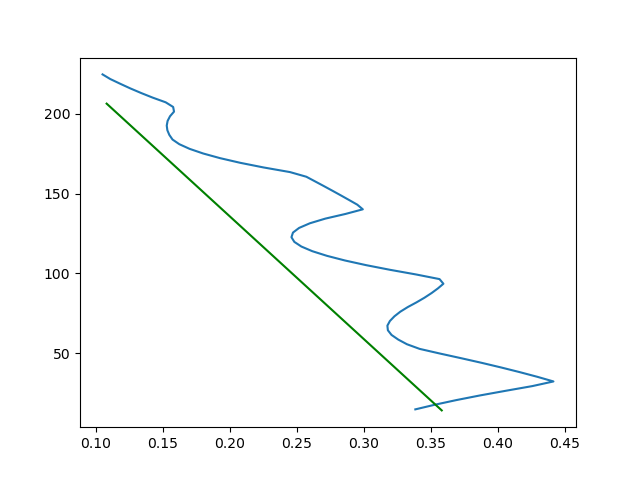

In [22]:
fig, ax = plt.subplots()
#ax.plot(s_bott_arr[0,:,0], height_arr[0,:,0], color='green');
#ax.plot(dc_cor.dic_crack.U1_Kb[:dc_cor.dic_crack.N_tip,1], height_model)
ax.plot(sp.u_t_crc_Kb[:73,0], crack_5.x_1_crc_Ka[:,1])
ax.plot(w_array, height_scpt[:26], color='green')

In [23]:
s_array = np.linspace(s_bott_arr[0,150,0], s_bott_arr[0,150,0], 26)
s_array

array([0.05880183, 0.05880183, 0.05880183, 0.05880183, 0.05880183,
       0.05880183, 0.05880183, 0.05880183, 0.05880183, 0.05880183,
       0.05880183, 0.05880183, 0.05880183, 0.05880183, 0.05880183,
       0.05880183, 0.05880183, 0.05880183, 0.05880183, 0.05880183,
       0.05880183, 0.05880183, 0.05880183, 0.05880183, 0.05880183,
       0.05880183])

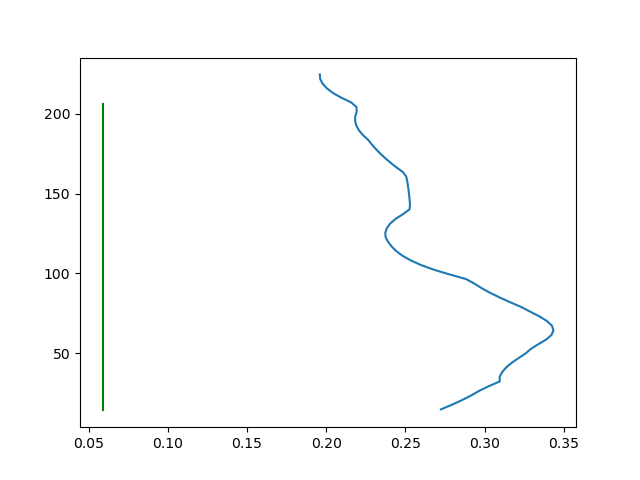

In [24]:
fig, ax = plt.subplots()
#ax.plot(s_bott_arr[0,:,0], height_arr[0,:,0], color='green');
#ax.plot(dc_cor.dic_crack.U1_Kb[:dc_cor.dic_crack.N_tip,1], height_model)
ax.plot(sp.u_t_crc_Kb[:73,1], crack_5.x_1_crc_Ka[:,1])
ax.plot(s_array, height_scpt[:26], color='green')

In [26]:
dic_grid = DICGrid(U_factor=100, dir_name='B1_TV1')
t1 = dic_grid.argmax_F_dic_T

#t_arr = np.arange(0, t1, dic_grid.t)
t_arr = np.linspace(0,1,t1)
print(t_arr)
for t in t_arr[::1]:
    
    dic_grid.t = t

    #dc_cor.state_changed = True
    print('*********')
    print(t)
    print(dic_grid.t)
    print(dic_grid.F_T1)
    
    
    dsf = DICStateFields(dic_grid=dic_grid)
    dsf.tmodel_.trait_set(E=5000, c_T=0, nu=0.18, epsilon_0=0.0005, epsilon_f=0.01);
    dsf.eval()
    print('t1', dsf.T1)
    #print(dsf.omega_TMN)
    

    
    dcl = DICCrackList(dsf=dsf)
    #print(dcl.cracks_T)
    crack_s = dcl.items[3]
    #crack_5.cl.dsf 
    #dc_cor = DICCrackCOR(dic_crack = crack_5)
    print(crack_s.T1)
#     sp = DICStressProfile(dic_crack = crack_5)
#     print(sp.dic_crack.T1)

[0.         0.03846154 0.07692308 0.11538462 0.15384615 0.19230769
 0.23076923 0.26923077 0.30769231 0.34615385 0.38461538 0.42307692
 0.46153846 0.5        0.53846154 0.57692308 0.61538462 0.65384615
 0.69230769 0.73076923 0.76923077 0.80769231 0.84615385 0.88461538
 0.92307692 0.96153846 1.        ]
*********
0.0
0.0
0.0
t1 0
Creating cracks
18
*********
0.038461538461538464
0.038461538461538464
13.0
t1 1
Creating cracks
18
*********
0.07692307692307693
0.07692307692307693
24.0
t1 2
Creating cracks
18
*********
0.11538461538461539
0.11538461538461539
39.0
t1 3
Creating cracks
18
*********
0.15384615384615385
0.15384615384615385
50.0
t1 4
Creating cracks
18
*********
0.19230769230769232
0.19230769230769232
66.0
t1 5
Creating cracks
18
*********
0.23076923076923078
0.23076923076923078
77.0
t1 6
Creating cracks
18
*********
0.2692307692307693
0.2692307692307693
87.0
t1 7
Creating cracks
18
*********
0.3076923076923077
0.3076923076923077
103.0
t1 8
Creating cracks
18
*********
0.34615384

In [5]:
# file = open('D:\Shear zones\SCPT files\B1-TV1 opening.csv')
# file

<_io.TextIOWrapper name='D:\\Shear zones\\SCPT files\\B1-TV1 opening.csv' mode='r' encoding='cp1252'>

In [6]:
U_TPa = np.array([
            np.loadtxt('D:\Shear zones\SCPT files\B1-TV1 opening.csv', dtype=float,
                       skiprows=1, delimiter=',', usecols=(2,3), unpack=False)
        ], dtype=np.float_)

ValueError: could not convert string to float: ''

In [7]:
data = np.loadtxt('D:\Shear zones\SCPT files\B1-TV1 opening.csv', 
           dtype={'names': ('point', 'empty', 'x', 'y'), 'formats': 
                  (np.str_, np.str_, np.float_, np.float_)},
                       skiprows=0, delimiter=',', unpack=False)

ValueError: could not convert string to float: ''